In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [2]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 10000, Number of columns: 14


In [3]:
df.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


## Data Preparation

In [4]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [5]:
df.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0


In [6]:
# Checking defective class to get unique values and their counts
defective_classes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

for col in defective_classes:
    unique_value_counts = df[col].value_counts()
    print(f"Value counts for {col}:")
    print(unique_value_counts)
    print("-" * 50)

Value counts for TWF:
TWF
0    9954
1      46
Name: count, dtype: int64
--------------------------------------------------
Value counts for HDF:
HDF
0    9885
1     115
Name: count, dtype: int64
--------------------------------------------------
Value counts for PWF:
PWF
0    9905
1      95
Name: count, dtype: int64
--------------------------------------------------
Value counts for OSF:
OSF
0    9902
1      98
Name: count, dtype: int64
--------------------------------------------------
Value counts for RNF:
RNF
0    9981
1      19
Name: count, dtype: int64
--------------------------------------------------


In [7]:
# Merging all classes into one column
df['Machine failure'] = 0
df.loc[df['Machine failure'] == 0, 'Machine failure'] = 'No Failure'
df.loc[df['TWF'] == 1, 'Machine failure'] = 'TWF'
df.loc[df['HDF'] == 1, 'Machine failure'] = 'HDF'
df.loc[df['PWF'] == 1, 'Machine failure'] = 'PWF'
df.loc[df['OSF'] == 1, 'Machine failure'] = 'OSF'
df.loc[df['RNF'] == 1, 'Machine failure'] = 'RNF'

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


In [9]:
df['Power'] = df[['Rotational speed [rpm]', 'Torque [Nm]']].product(axis=1)

In [10]:
# descriptive information on numerical attributes

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.00,253.0
Power,10000.0,59967.14704,10193.093881,10966.8,53105.4,59883.9,66873.75,99980.4


In [11]:
# descriptive information on categorical attributes

df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

,count,unique,top,freq
Type,10000,3,L,6000
Machine failure,10000,6,No Failure,9652


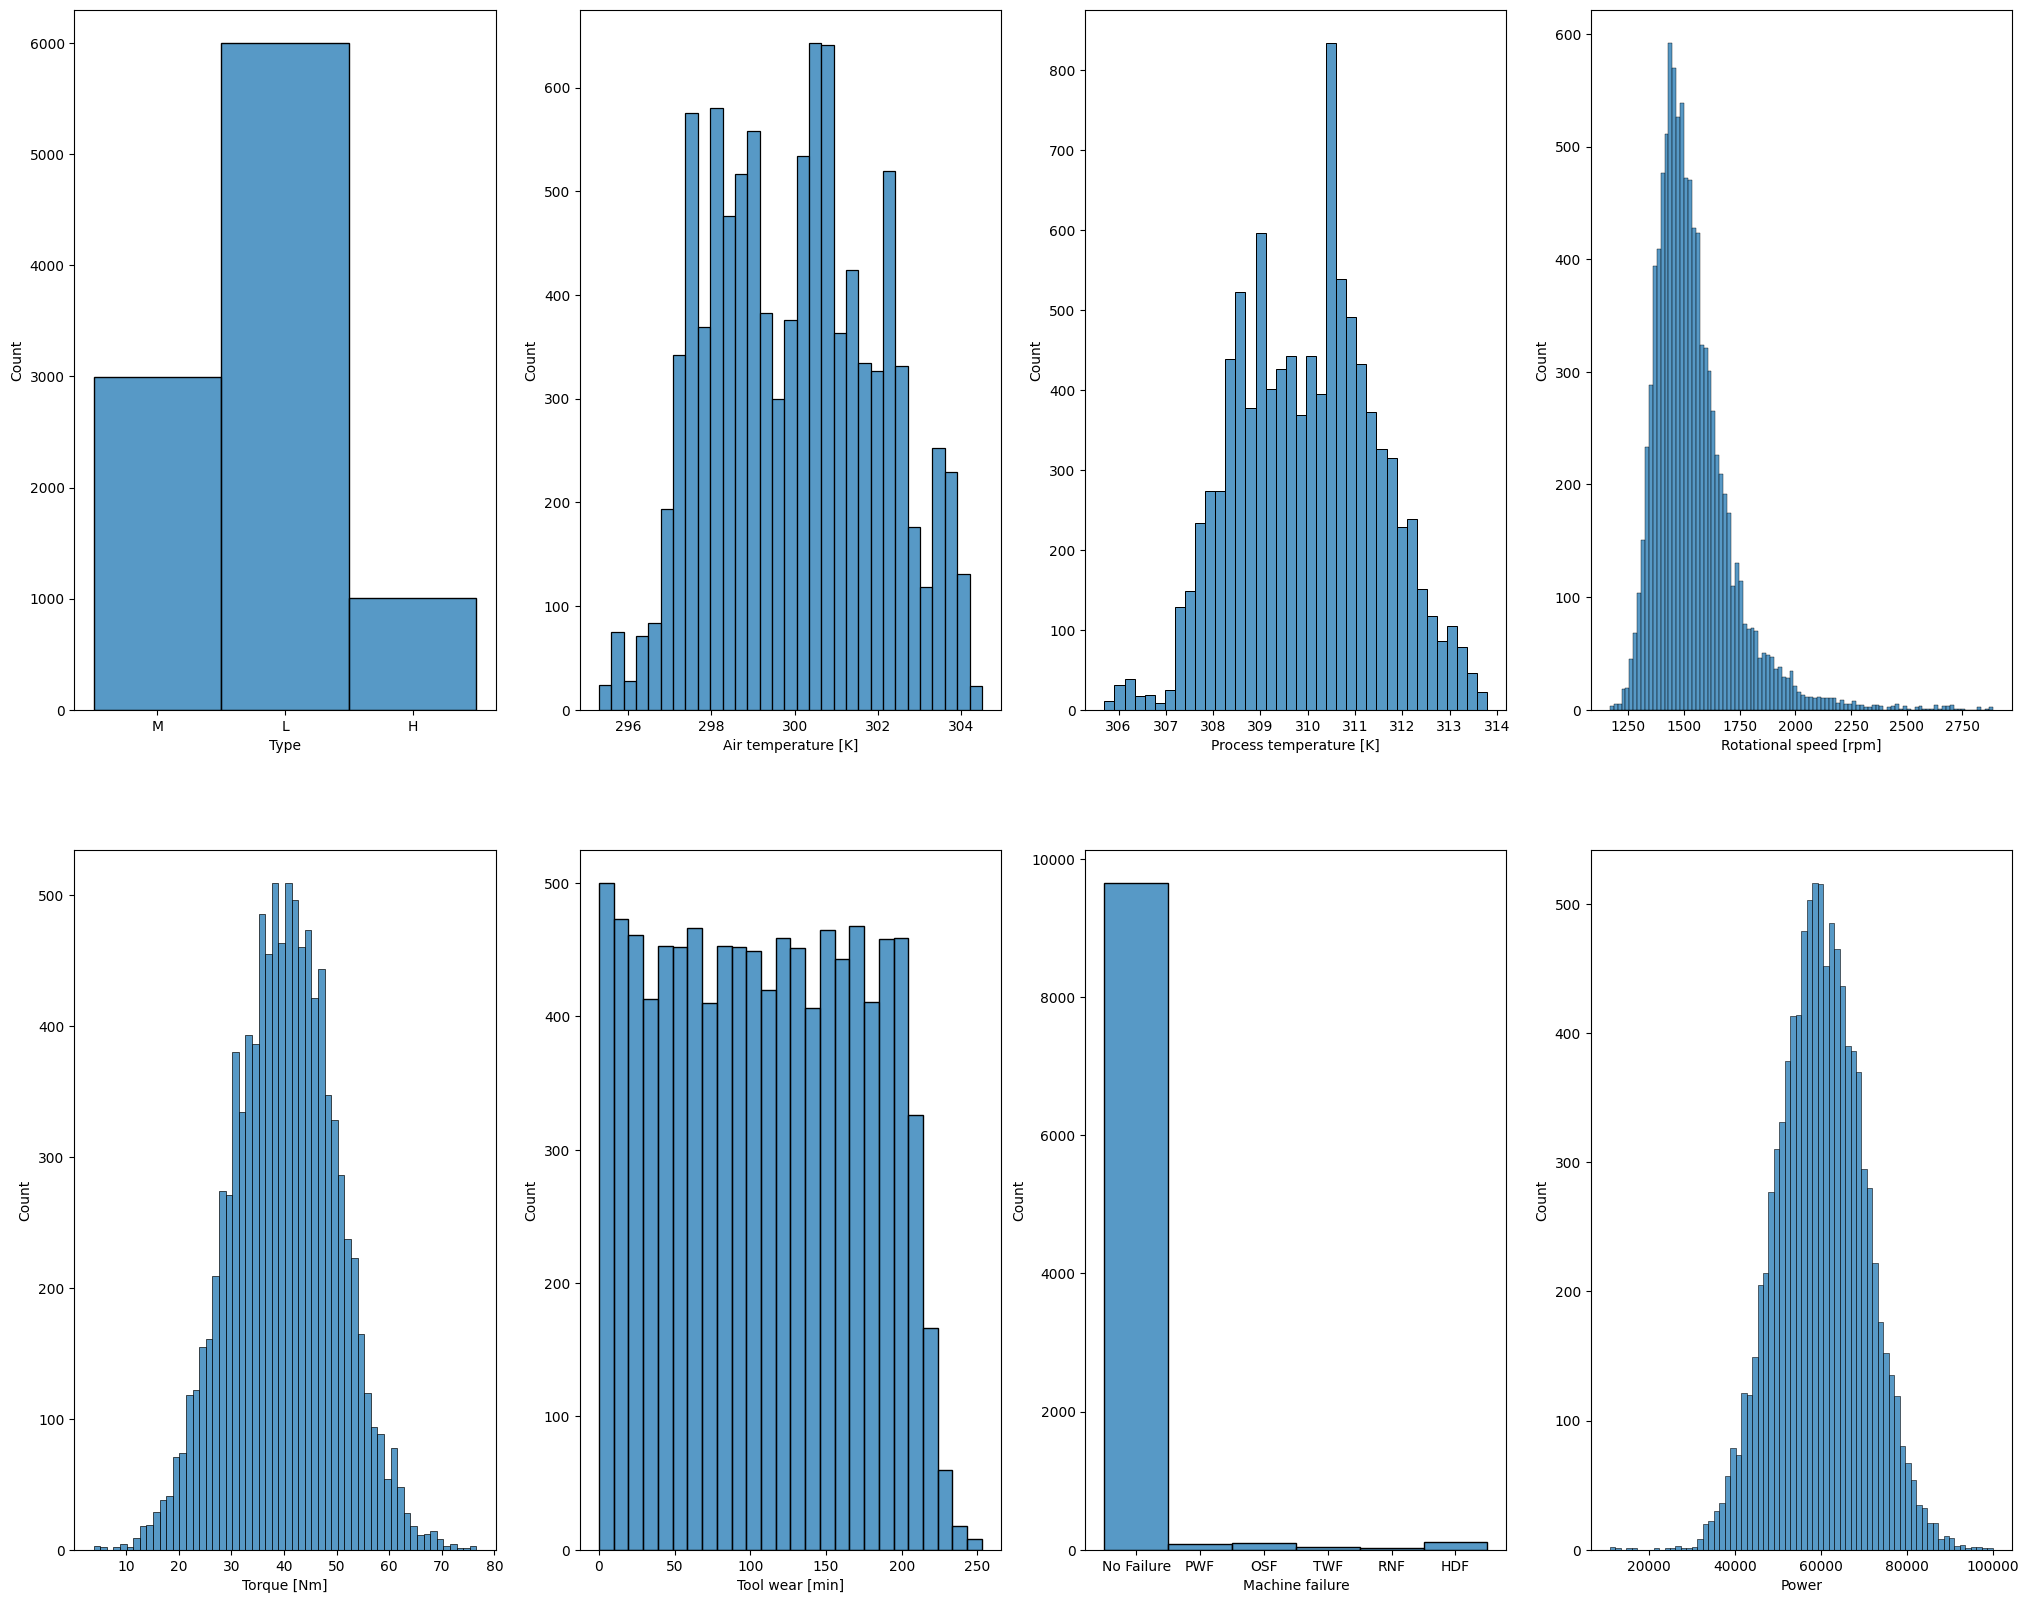

In [12]:
# Checking data for class imbalance

fig, ax = plt.subplots(2, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

In [13]:
print(df['Machine failure'].value_counts())

Machine failure
No Failure    9652
HDF            106
OSF             98
PWF             83
TWF             42
RNF             19
Name: count, dtype: int64


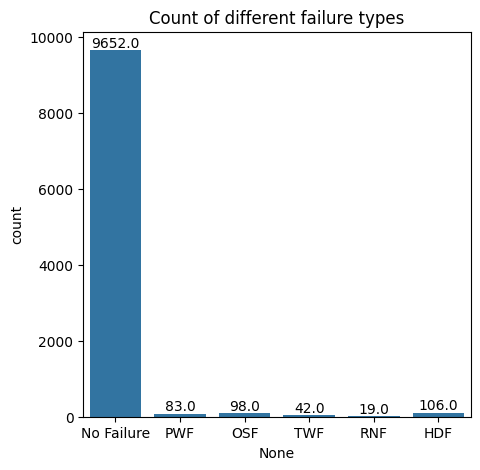

In [14]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Encode categorical variables
label_encoder_x = LabelEncoder()
df['Type'] = label_encoder_x.fit_transform(df['Type'])

# Assuming df is your dataframe and the features are in X and target in y
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']

In [16]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

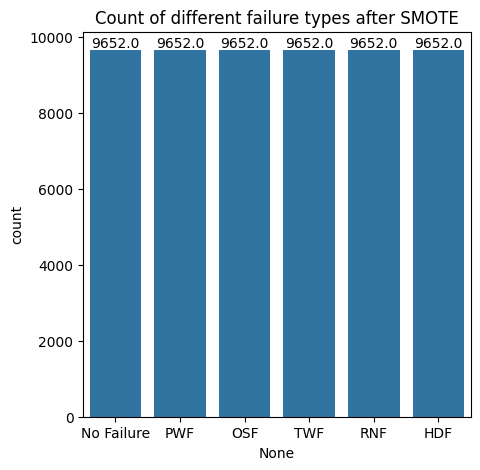

In [17]:
# Visualize the count of different failure types after oversampling
failure_types_after_smote = pd.DataFrame(y, columns=['Machine failure'])
rows_sum_after_smote = failure_types_after_smote.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum_after_smote, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Count of different failure types after SMOTE')
plt.show()

In [18]:
# Encode the target variable
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [19]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_y.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

         HDF       1.00      1.00      1.00      1880
  No Failure       1.00      0.96      0.98      1962
         OSF       1.00      1.00      1.00      1932
         PWF       1.00      1.00      1.00      1958
         RNF       0.99      1.00      0.99      1917
         TWF       0.98      1.00      0.99      1934

    accuracy                           0.99     11583
   macro avg       0.99      0.99      0.99     11583
weighted avg       0.99      0.99      0.99     11583

Accuracy: 0.993006993006993


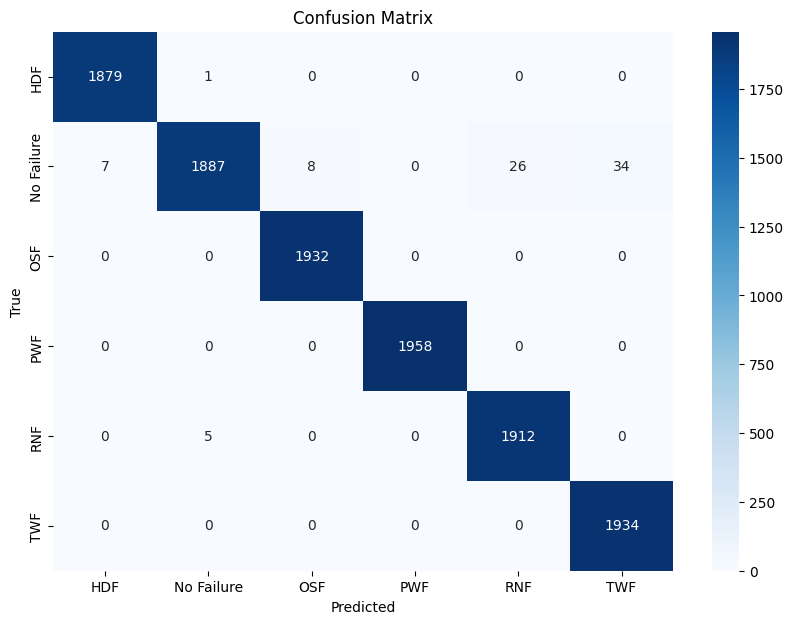

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_y.classes_, yticklabels=label_encoder_y.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
import pickle

# Saving the model, label encoder and scaler
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
with open('label_encoder_y.pkl', 'wb') as le_file:
    pickle.dump(label_encoder_y, le_file)

In [24]:
# Sample sops
sops = {
    'No Failure': 'No action required.',
    'HDF': 'High defect failure: Inspect the tool and replace if necessary. Check for material defects.',
    'OSF': 'Overstrain failure: Reduce the load on the machine and check for any blockages.',
    'PWF': 'Power failure: Check the power supply and connections. Reset the machine if necessary.',
    'RNF': 'Random failure: Perform a full diagnostic of the machine. Check all systems.',
    'TWF': 'Tool wear failure: Replace or sharpen the tool. Check the tool wear regularly.'
}

with open('sops.pkl', 'wb') as sop_file:
    pickle.dump(sops, sop_file)

In [25]:
!pip install streamlit
import streamlit as st

In [26]:
%%writefile app.py

import streamlit as st
import pickle
import pandas as pd

# Load the saved model, scaler, label encoder, and SOPs
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))
label_encoder = pickle.load(open('label_encoder_y.pkl', 'rb'))
sops = pickle.load(open('sops.pkl', 'rb'))

# Streamlit app
st.title('Machine Failure Prediction')
st.write("Enter the parameters to predict machine failure:")

def main():
    air_temperature = st.slider("Air temperature", 295, 305)
    process_temperature = st.slider("Process temperature", 306, 314)
    rotational_speed = st.slider("Rotational speed", 1168, 2886)
    torque = st.slider("Torque", 3.8, 76.6)
    tool_wear = st.slider("Tool wear", 0, 253)
    type = st.selectbox("Type", ["L", "M", "H"])

    if st.button("Predict"):
        mapping = {'L': 0, 'M': 1, 'H': 2}
        input_data = pd.DataFrame({
            'Type': [mapping[type]],
            'Air temperature [K]': [air_temperature],
            'Process temperature [K]': [process_temperature],
            'Rotational speed [rpm]': [rotational_speed],
            'Torque [Nm]': [torque],
            'Tool wear [min]': [tool_wear],
            'Power': [torque * rotational_speed]
        })

        # Normalize the inputs using the saved scaler
        input_data_scaled = scaler.transform(input_data)

        # Predict
        prediction = model.predict(input_data_scaled)
        prediction_proba = model.predict_proba(input_data_scaled)

        prediction_label = label_encoder.inverse_transform(prediction)[0]
        prediction_proba_dict = {label_encoder.inverse_transform([i])[0]: proba for i, proba in enumerate(prediction_proba[0])}

        st.write(f"Prediction: {prediction_label}")
        st.write("Prediction probabilities:")
        st.write(prediction_proba_dict)

        st.write("Standard Operating Procedure:")
        st.write(sops[prediction_label])

        if prediction_label != "No Failure":
            st.write("Action: Need maintenance")
        else:
            st.write("Action: No action required")

if __name__ == "__main__":
    main()


Overwriting app.py


In [27]:
!wget -q -O - ipv4.icanhazip.com

34.82.29.56


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.29.56:8501

npx: installed 22 in 3.846s
your url is: https://real-baths-trade.loca.lt
/root/.npm/_npx/8768/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:36737 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/8768/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)
